# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#From API Lesson 2 - 3
base_url = "http://api.openweathermap.org/data/2.5/weather?"
cities = pd.DataFrame(cities)
cities

Lat = []
Lng = []
Temp = []
Humidity = []
Cloudiness = []
Windspeed = []

for index, row in cities.iterrows():
    city = row[0]
    print(f"Searching for weather for City #{index}, {city}.")
    try:
        query_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
        #print(query_url)
        cityweather = requests.get(query_url).json()
        Lat.append(cityweather['coord']['lat'])
        Lng.append(cityweather['coord']['lon'])
        Temp.append(cityweather['main']['temp'])
        Humidity.append(cityweather['main']['humidity'])
        Cloudiness.append(cityweather['clouds']['all'])
        Windspeed.append(cityweather['wind']['speed'])
    except:
        Lat.append("")
        Lng.append("")
        Temp.append("")
        Humidity.append("")
        Cloudiness.append("")
        Windspeed.append("")

Searching for weather for City #0, ushuaia.
Searching for weather for City #1, matara.
Searching for weather for City #2, rikitea.
Searching for weather for City #3, mangaluru.
Searching for weather for City #4, paradwip.
Searching for weather for City #5, teguise.
Searching for weather for City #6, korla.
Searching for weather for City #7, halalo.
Searching for weather for City #8, evensk.
Searching for weather for City #9, mayfield.
Searching for weather for City #10, busselton.
Searching for weather for City #11, bluff.
Searching for weather for City #12, karratha.
Searching for weather for City #13, muko.
Searching for weather for City #14, chernyshevskiy.
Searching for weather for City #15, orange.
Searching for weather for City #16, husum.
Searching for weather for City #17, mushie.
Searching for weather for City #18, hirara.
Searching for weather for City #19, beringovskiy.
Searching for weather for City #20, belushya guba.
Searching for weather for City #21, pisco.
Searching fo

Searching for weather for City #176, mahanoro.
Searching for weather for City #177, peabiru.
Searching for weather for City #178, guerrero negro.
Searching for weather for City #179, clyde river.
Searching for weather for City #180, hithadhoo.
Searching for weather for City #181, mahebourg.
Searching for weather for City #182, gainesville.
Searching for weather for City #183, attawapiskat.
Searching for weather for City #184, ruwi.
Searching for weather for City #185, bafoulabe.
Searching for weather for City #186, faanui.
Searching for weather for City #187, qaanaaq.
Searching for weather for City #188, iberia.
Searching for weather for City #189, ahipara.
Searching for weather for City #190, alice springs.
Searching for weather for City #191, ambovombe.
Searching for weather for City #192, lata.
Searching for weather for City #193, te anau.
Searching for weather for City #194, waddan.
Searching for weather for City #195, henties bay.
Searching for weather for City #196, buraydah.
Sea

Searching for weather for City #351, ler.
Searching for weather for City #352, shingu.
Searching for weather for City #353, vila franca do campo.
Searching for weather for City #354, huanan.
Searching for weather for City #355, barentsburg.
Searching for weather for City #356, ancud.
Searching for weather for City #357, englewood.
Searching for weather for City #358, mandalgovi.
Searching for weather for City #359, la ronge.
Searching for weather for City #360, garden acres.
Searching for weather for City #361, jurm.
Searching for weather for City #362, rio grande.
Searching for weather for City #363, tayoltita.
Searching for weather for City #364, dolinsk.
Searching for weather for City #365, nushki.
Searching for weather for City #366, quatre cocos.
Searching for weather for City #367, morgan city.
Searching for weather for City #368, salinopolis.
Searching for weather for City #369, spoleto.
Searching for weather for City #370, daliang.
Searching for weather for City #371, oropesa.


Searching for weather for City #525, viligili.
Searching for weather for City #526, langsa.
Searching for weather for City #527, palkino.
Searching for weather for City #528, lorengau.
Searching for weather for City #529, belyy yar.
Searching for weather for City #530, oranjemund.
Searching for weather for City #531, coihaique.
Searching for weather for City #532, bowling green.
Searching for weather for City #533, waingapu.
Searching for weather for City #534, kontagora.
Searching for weather for City #535, luderitz.
Searching for weather for City #536, broken hill.
Searching for weather for City #537, ilebo.
Searching for weather for City #538, linkou.
Searching for weather for City #539, chara.
Searching for weather for City #540, harper.
Searching for weather for City #541, teya.
Searching for weather for City #542, vanavara.
Searching for weather for City #543, xingyi.
Searching for weather for City #544, khonuu.
Searching for weather for City #545, mehamn.
Searching for weather f

In [5]:
cities["Lat"]=Lat
cities["Lng"]=Lng
cities["Temp"]=Temp
cities["Humidity"]=Humidity
cities["Cloudiness"]=Cloudiness
cities["Windspeed"]=Windspeed
cities = cities.rename(columns={0:"City"})

In [6]:
cities = cities.set_index(["City"])
cities = cities.dropna(how="any")
cities = cities[cities.Lat != ""]
cities.to_csv('WeatherData.csv',index=True)
display(cities)

,Lat,Lng,Temp,Humidity,Cloudiness,Windspeed
City,,,,,,
ushuaia,-54.8,-68.3,12,81,40,2.6
matara,5.95,80.54,24.27,90,81,1.95
rikitea,-23.12,-134.97,25.33,72,55,8.19
mangaluru,12.87,74.88,25,78,5,3.6
teguise,29.06,-13.56,18,82,0,7.2
...,...,...,...,...,...,...
savannah bight,16.45,-85.85,27.51,80,0,14.31
touho,-20.78,165.23,28.32,67,3,3.29
anadyr,64.75,177.48,-15,65,0,2


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

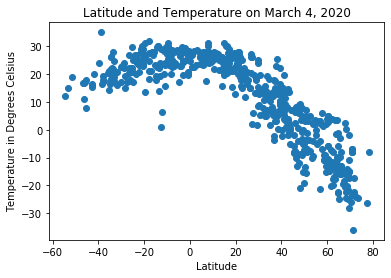

In [21]:
plt.scatter(cities.Lat, cities.Temp)
plt.title("Latitude and Temperature on March 4, 2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

#### Latitude vs. Humidity Plot

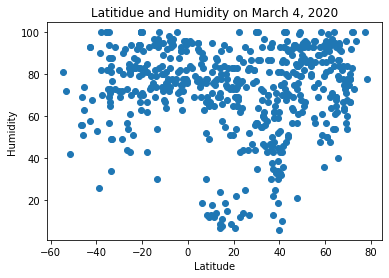

In [22]:
plt.scatter(cities.Lat, cities.Humidity)
plt.title("Latitidue and Humidity on March 4, 2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

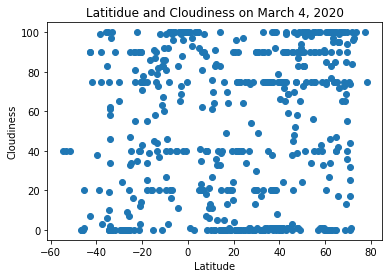

In [23]:
plt.scatter(cities.Lat, cities.Cloudiness)
plt.title("Latitidue and Cloudiness on March 4, 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

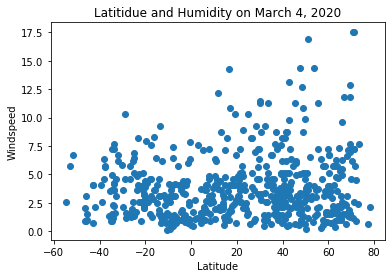

In [24]:
plt.scatter(cities.Lat, cities.Windspeed)
plt.title("Latitidue and Humidity on March 4, 2020")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots


In [38]:
# Create Northern and Southern Hemisphere DataFrames
cities_north = cities[cities.Lat > 0]
cities_south = cities[cities.Lat < 0]

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, matara to sibolga
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Lat         383 non-null    object
 1   Lng         383 non-null    object
 2   Temp        383 non-null    object
 3   Humidity    383 non-null    object
 4   Cloudiness  383 non-null    object
 5   Windspeed   383 non-null    object
dtypes: object(6)
memory usage: 20.9+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

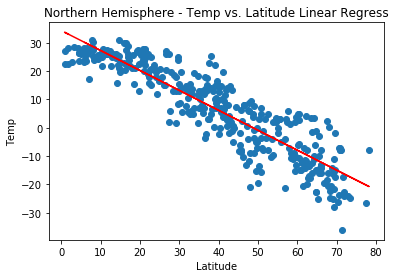

In [42]:
x = cities_north.Lat.astype("double")
y = cities_north.Temp.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Temp")
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regress")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

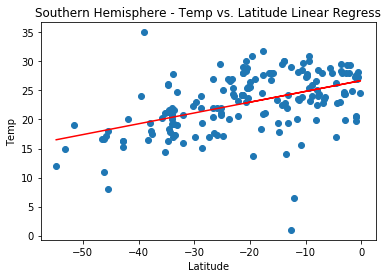

In [44]:
x = cities_south.Lat.astype("double")
y = cities_south.Temp.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Temp")
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regress")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

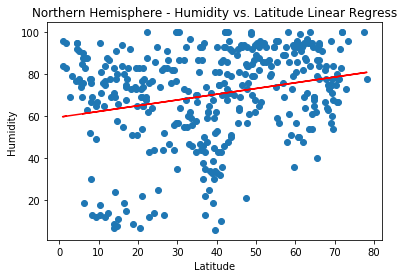

In [47]:
x = cities_north.Lat.astype("double")
y = cities_north.Humidity.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regress")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

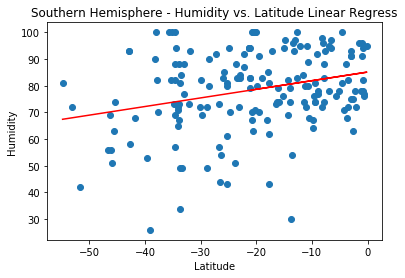

In [46]:
x = cities_south.Lat.astype("double")
y = cities_south.Humidity.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regress")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

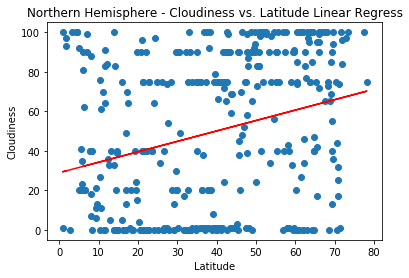

In [48]:
x = cities_north.Lat.astype("double")
y = cities_north.Cloudiness.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regress")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

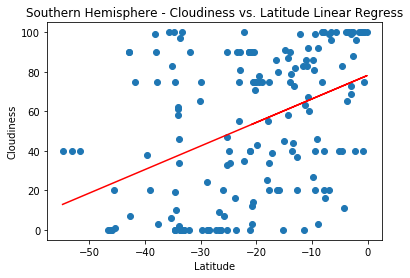

In [50]:
x = cities_south.Lat.astype("double")
y = cities_south.Cloudiness.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regress")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

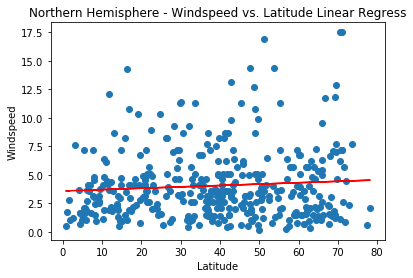

In [49]:
x = cities_north.Lat.astype("double")
y = cities_north.Windspeed.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regress")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

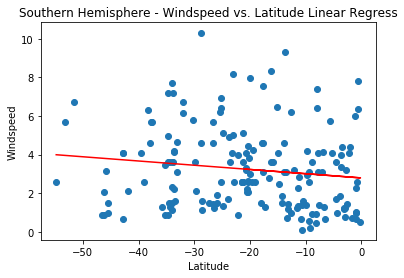

In [51]:
x = cities_south.Lat.astype("double")
y = cities_south.Windspeed.astype("double")
plt.scatter(x,y)
slope, inter, r, p, stderr = stats.linregress(x,y)
fit = slope * x + inter
plt.plot(x, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Southern Hemisphere - Windspeed vs. Latitude Linear Regress")
plt.show()